<a href="https://colab.research.google.com/github/Aj-AB/Deep-Learning/blob/main/Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Prediction with ANN

In [20]:
#Importing libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df=pd.read_csv("Churn_Modelling.csv") # reading from csv file
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [22]:
df.shape # dimension 

(10000, 14)

In [23]:
# spliting into dependent and independent featuer
X=df.iloc[:,3:13]
y=df.iloc[:,13]

In [24]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [25]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [26]:
## Feature Engineering the dataset
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)



In [27]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [28]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [29]:
X=X.drop(['Geography','Gender'],axis=1) # Drop 'Geography','Gender' column in X dataset


In [30]:
X.head()# 'Geography','Gender' is removed from the dataset X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [31]:
# concatinate 'Geography','Gender' with dataset X
# update in X dataset

X=pd.concat([X,gender,geography],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1


In [38]:
# Splitting the dataset into Train and Test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [39]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [40]:
X_train # checking the transformation of the Train Dataset

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -1.09168714,
        -0.5698444 ,  1.74309049],
       [-2.30455945,  0.30102557, -1.37744033, ...,  0.91601335,
         1.75486502, -0.57369368],
       [-1.19119591, -0.94312892, -1.031415  , ..., -1.09168714,
        -0.5698444 , -0.57369368],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.91601335,
        -0.5698444 , -0.57369368],
       [-0.62420521, -0.08179119,  1.39076231, ..., -1.09168714,
        -0.5698444 ,  1.74309049],
       [-0.28401079,  0.87525072, -1.37744033, ..., -1.09168714,
         1.75486502, -0.57369368]])

In [41]:
X_test # tranformation of the Test dataset

array([[-0.55204276, -0.36890377,  1.04473698, ..., -1.09168714,
         1.75486502, -0.57369368],
       [-1.31490297,  0.10961719, -1.031415  , ..., -1.09168714,
        -0.5698444 , -0.57369368],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -1.09168714,
        -0.5698444 ,  1.74309049],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ...,  0.91601335,
        -0.5698444 ,  1.74309049],
       [-0.00566991, -0.46460796, -0.33936434, ...,  0.91601335,
         1.75486502, -0.57369368],
       [-0.79945688, -0.84742473,  1.04473698, ...,  0.91601335,
         1.75486502, -0.57369368]])

In [42]:
X_train.shape # checking the row and column of the dataset

(8000, 11)

In [43]:
X_test.shape

(2000, 11)

In [70]:
#Using Artificial Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU
from tensorflow.keras.layers import Dropout

In [71]:
# Initializing the Artificial Neural Network
classifier=Sequential()

In [72]:
# Adding the Artificial Neural Network layers
classifier.add(Dense(units=11,activation='relu')) #Input layer
classifier.add(Dropout(0.2))
classifier.add(Dense(units=7,activation='relu')) #1st hidden layer
classifier.add(Dropout(0.3))
classifier.add(Dense(units=6,activation='relu')) # 2nd hidden layer
classifier.add(Dropout(0.4))
classifier.add(Dense(units=1,activation='sigmoid'))# output layer



In [73]:
import tensorflow as tf
opt=tf.keras.optimizers.Adam(learning_rate=0.01)

In [74]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [75]:
## Early Stopping
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [76]:
model=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4889 - accuracy: 0.7977 - val_loss: 0.4114 - val_accuracy: 0.8107
Epoch 2/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4454 - accuracy: 0.8121 - val_loss: 0.3946 - val_accuracy: 0.8281
Epoch 3/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4318 - accuracy: 0.8181 - val_loss: 0.3985 - val_accuracy: 0.8209
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4313 - accuracy: 0.8136 - val_loss: 0.4002 - val_accuracy: 0.8243
Epoch 5/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.4261 - accuracy: 0.8164 - val_loss: 0.4011 - val_accuracy: 0.8171
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4191 - accuracy: 0.8188 - val_loss: 0.3844 - val_accuracy: 0.8379
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4139 - accuracy: 0.8212 - val_loss: 0.3962 - val_accuracy:

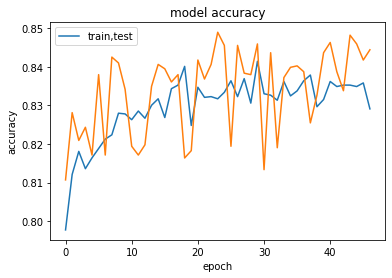

In [77]:
# Plot accuracy

plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train,test'],loc='upper left')
plt.show()

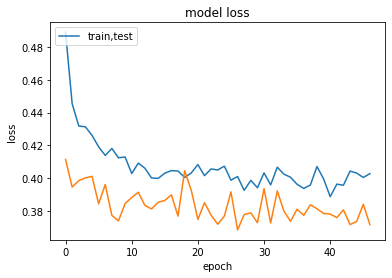

In [78]:
# plot Loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train,test'],loc='upper left')
plt.show()

In [79]:
# Prediction and Evaluate

y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

In [80]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1573,   22],
       [ 260,  145]])

In [81]:
## calculate the accuracy score
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.859